In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
from PIL import ImageOps
import time


In [3]:
wavelength = .01
sigmaOnf = .05
fo = 1.0/wavelength

angle = 1.25
thetaSigma = .5

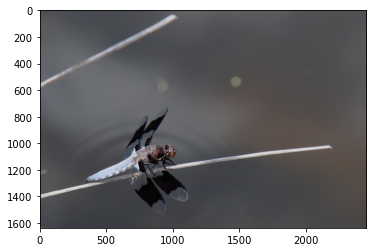

In [4]:
filepath = "/Users/anthonyesposito/Desktop/GitWork/Work_In_Progress/Exercises/Machine_Learning/Log_Gabor/IMG_0727.jpg"

img = cv.imread(filepath)
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

%matplotlib inline
plt.imshow(np.asarray(img[:,:,[2,1,0]]))

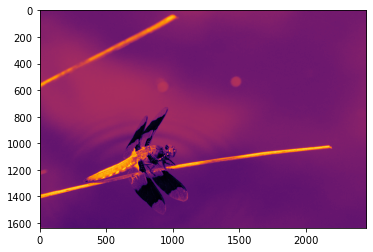

In [5]:
plt.imshow(imgG, cmap='inferno')

In [7]:
rows, cols = imgG.shape

cols_opt = cv.getOptimalDFTSize(cols)
rows_opt = cv.getOptimalDFTSize(rows)

img_zeros_opt = np.zeros((rows_opt, cols_opt), dtype='float32')
img_zeros_opt[:rows, :cols] = imgG

xv = np.linspace(-cols//2+1, cols//2, cols)
yv = np.linspace(-rows//2+1, rows//2, rows)

x, y = np.meshgrid(xv, yv)

double_zero = np.where((x==0) & (y==0))

x[double_zero[0][0], double_zero[1][0]] = 1
y[double_zero[0][0], double_zero[1][0]] = 1

radius = np.sqrt(np.copy(x)**2 + np.copy(y)**2)

logGabor = np.exp( - ( np.log( radius / fo ) ) ** 2 ) / (2 * np.log( sigmaOnf ) ** 2 )
logGabor[double_zero[0][0], double_zero[1][0]] = 0

angle_rad = angle * np.pi

theta = np.arctan2(np.copy(-y),np.copy(x))
sintheta = np.sin(theta)
costheta = np.cos(theta)

ds = sintheta * np.cos(angle_rad) - costheta * np.sin(angle_rad)
dc = costheta * np.cos(angle_rad) + sintheta * np.sin(angle_rad)

dtheta = np.abs(np.arctan2(ds,dc))
spread = np.exp( ( -dtheta ** 2 ) / ( 2 * thetaSigma ** 2 ))
log_Gabor_filter = spread * logGabor
LG_norm = (log_Gabor_filter / log_Gabor_filter.max()).astype('float32')


'''
t0 = time.time()
LG_norm_shift = np.fft.ifftshift(LG_norm)
img_F = cv.dft(np.float32(imgG), flags=cv.DFT_COMPLEX_OUTPUT)
img_F_LG = img_F * LG_norm_shift[:,:,np.newaxis]
img_back = cv.idft(img_F_LG, flags=cv.DFT_COMPLEX_INPUT)
img_back = np.real(img_back)
print(time.time() - t0)

'''

LG_norm_shift = np.fft.ifftshift(LG_norm)
t0 = time.time()
img_F = cv.dft(np.float32(imgG))
img_F_LG = np.zeros(img_F.shape, np.dtype('float32'))
img_F_LG = cv.multiply(img_F, LG_norm_shift, img_F_LG, dtype=5)
img_back = cv.idft(img_F_LG)
#img_back = np.real(img_back)
print(time.time()-t0)
#'''

<class 'int'>
2454 1636
0.13710904121398926


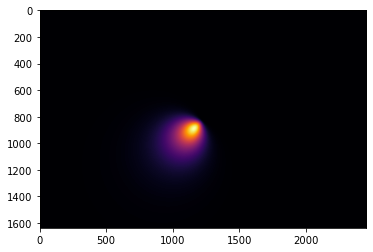

In [8]:
plt.imshow(LG_norm, cmap='inferno')

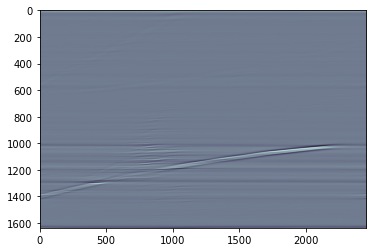

In [9]:
plt.imshow(img_back, 'bone')

#plt.imshow(img_back[:,:,0], 'bone')

In [8]:
import sys

In [9]:
sys.path

['/Users/anthonyesposito/Desktop/GitWork/Work_In_Progress/Exercises/Machine_Learning/Log_Gabor',
 '/Users/anthonyesposito/opt/anaconda3/lib/python37.zip',
 '/Users/anthonyesposito/opt/anaconda3/lib/python3.7',
 '/Users/anthonyesposito/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages',
 '/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg',
 '/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/anthonyesposito/.ipython']